In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"D:/clg/app_develop/Medical-Insurance-cost-prediction-master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='age', ylabel='charges'>

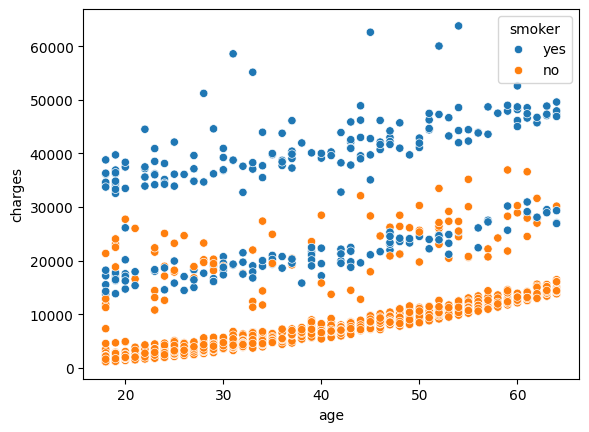

In [4]:
sns.scatterplot(x="age", y="charges", hue="smoker", data=df)


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [7]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

C:\Users\magan\AppData\Local\Temp\ipykernel_19548\3454039009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["charges"])


<Axes: xlabel='charges', ylabel='Density'>

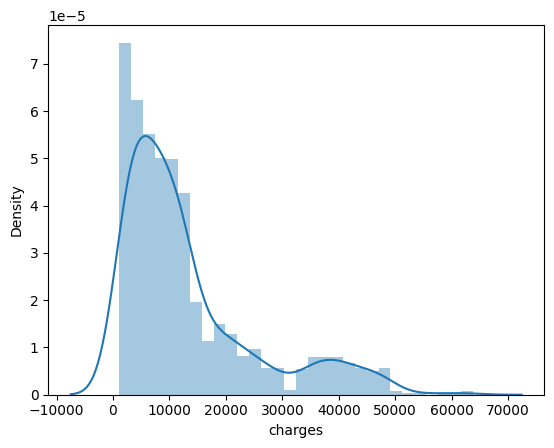

In [8]:
sns.distplot(df["charges"])

C:\Users\magan\AppData\Local\Temp\ipykernel_19548\316555093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<Axes: xlabel='age', ylabel='Density'>

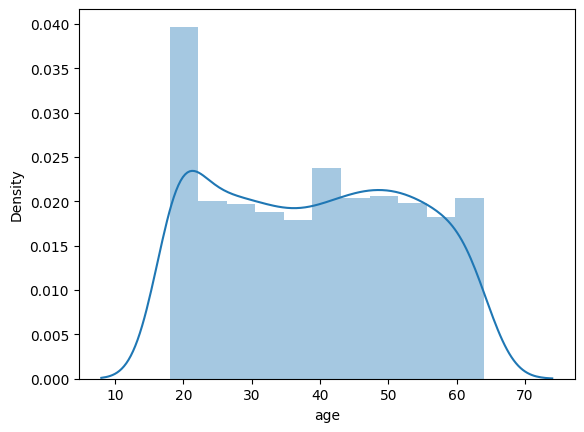

In [9]:
sns.distplot(df["age"])

C:\Users\magan\AppData\Local\Temp\ipykernel_19548\2859878543.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


<Axes: xlabel='bmi', ylabel='Density'>

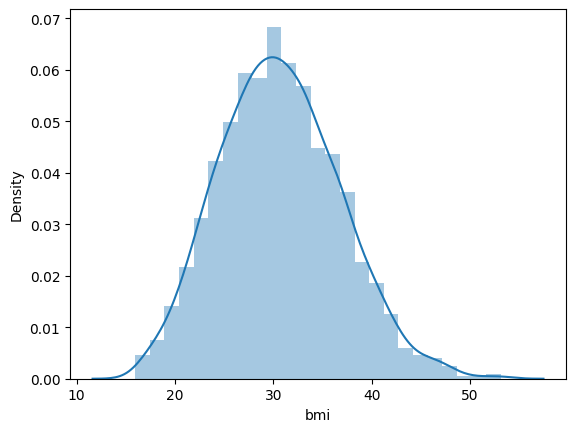

In [10]:
sns.distplot(df["bmi"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'female'

<Axes: xlabel='age', ylabel='charges'>

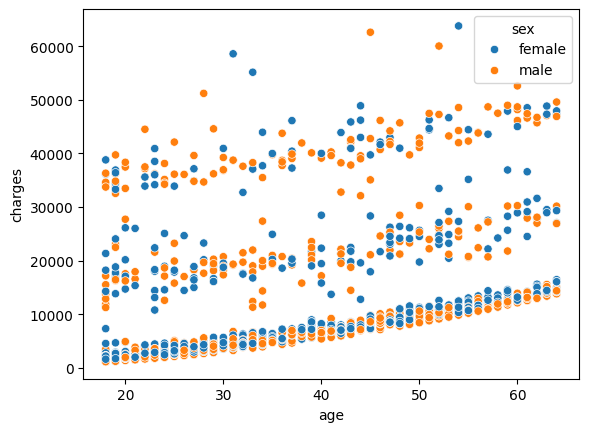

In [13]:
sns.scatterplot(x="age", y="charges", hue="sex", data=df)


<Axes: xlabel='bmi', ylabel='charges'>

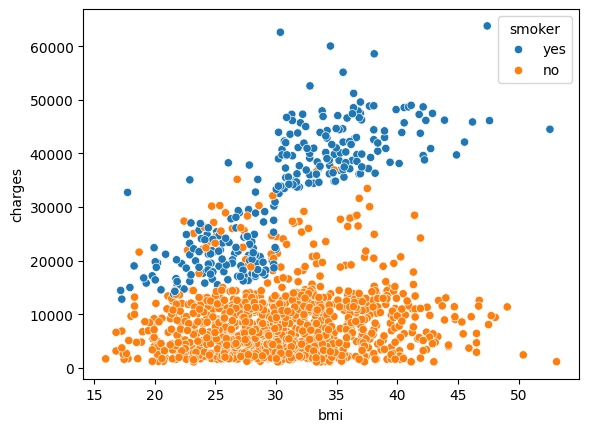

In [14]:
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df)


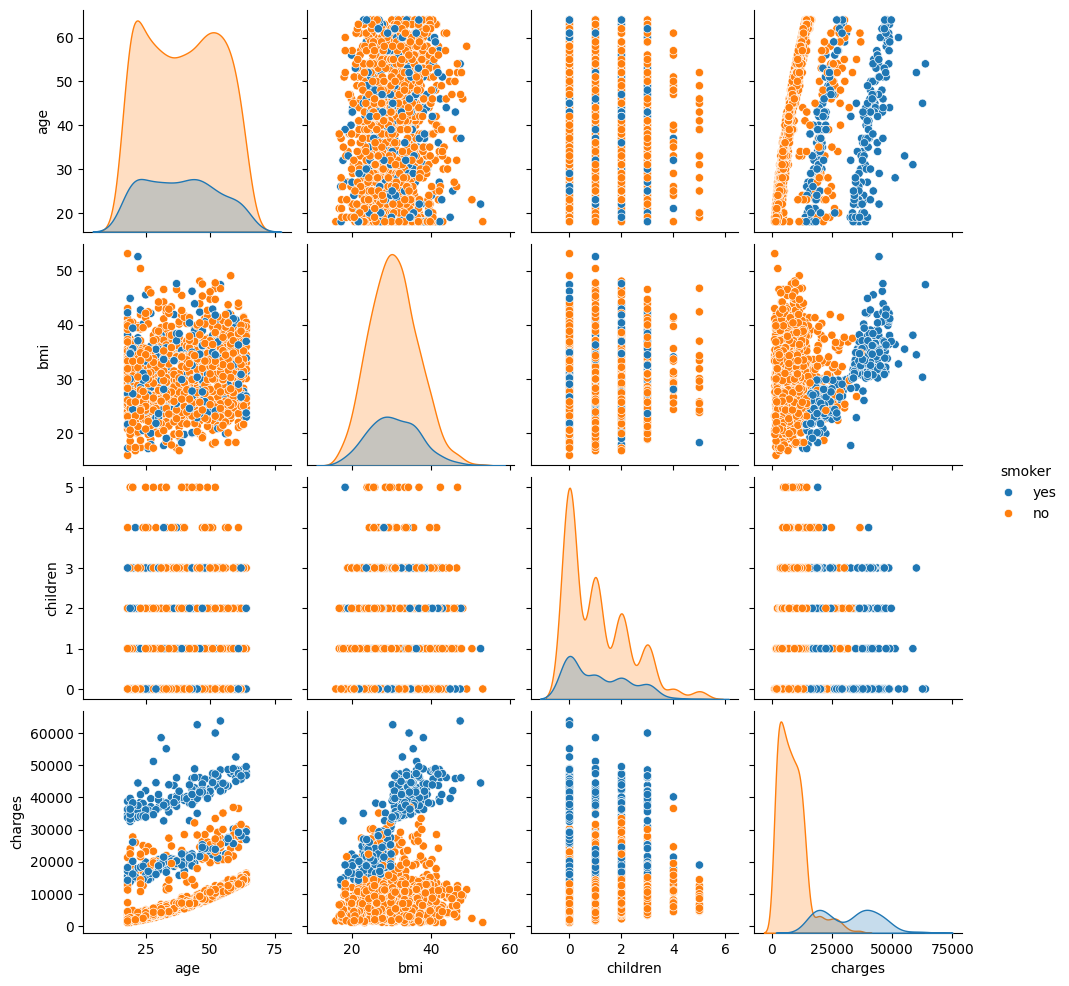

In [15]:
sns.pairplot(df,hue='smoker')

<Axes: xlabel='age', ylabel='charges'>

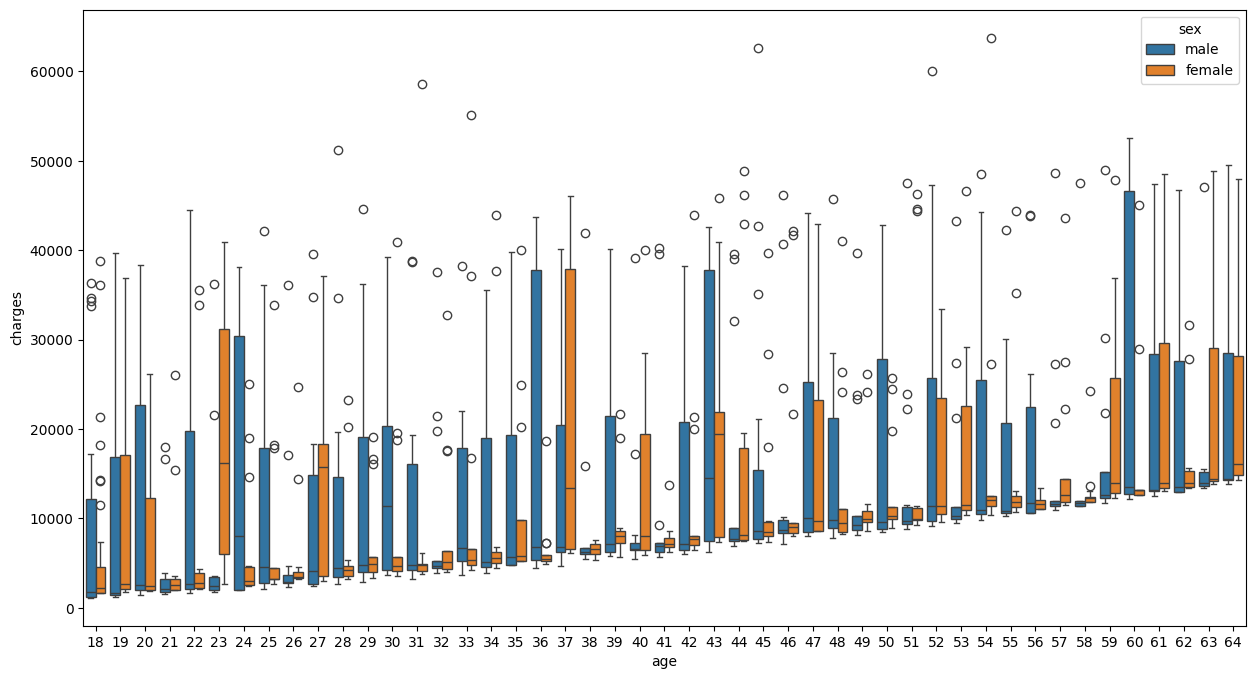

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='age',y='charges',hue='sex',data=df)


<Axes: xlabel='age', ylabel='charges'>

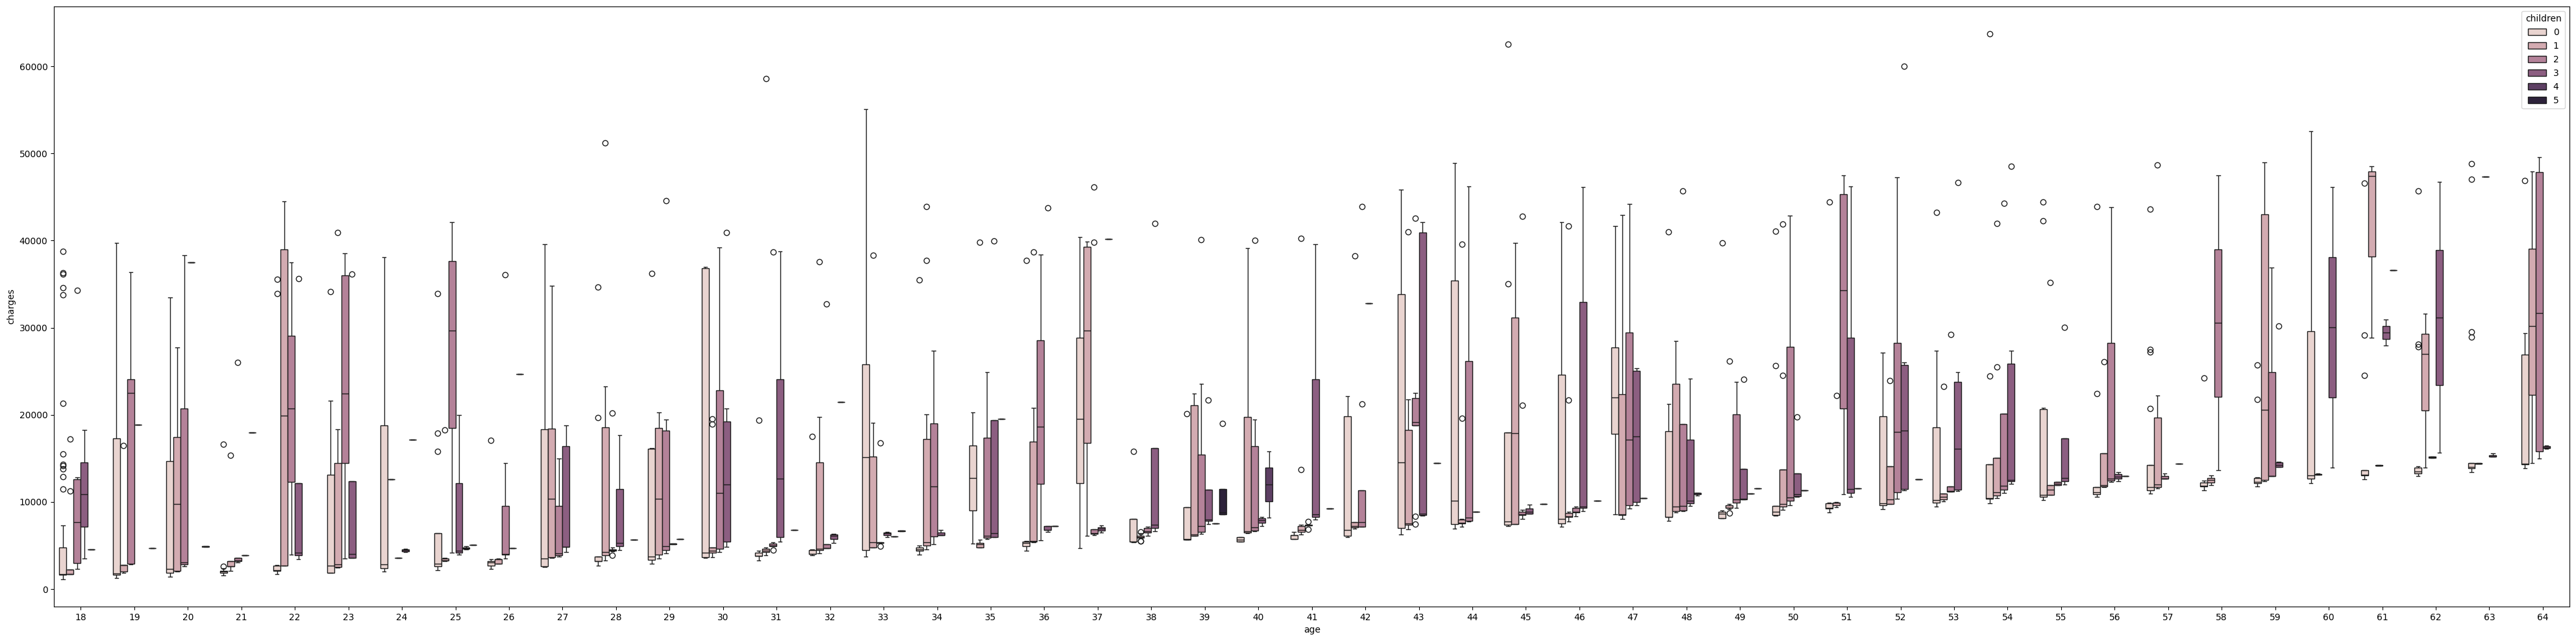

In [ ]:
plt.figure(figsize=(50,12))
sns.boxplot(x='age',y='charges',hue='children',data=df)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [17]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [18]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
cat_feat = ['sex', 'children', 'smoker', 'region']
num_feat = ['age','bmi']

In [22]:
oneht = OneHotEncoder(drop='first')
std = StandardScaler()

In [23]:
preprocessor = ColumnTransformer(transformers=[('num', std, num_feat),('cat', oneht, cat_feat)])

In [24]:
grid_param4 = {'dt__criterion': ["mse","mae"],
    'dt__max_depth' : range(2,32,1),
    'dt__min_samples_leaf' : range(1,10,1),
    'dt__min_samples_split': range(2,10,1),
    'dt__splitter' : ['best', 'random']}
grid_param5 = {'rf__n_estimators':[10,25,50,100,150,200],'rf__criterion': ["mse","mae"],
    'rf__max_depth' : range(2,32,1),
    'rf__min_samples_leaf' : range(1,10,1),
    'rf__min_samples_split': range(2,10,1),
    'rf__max_features': ["auto","sqrt","log2"]}

In [25]:
pipe1 = Pipeline(steps=[('preprocessor1',preprocessor),('lr',LinearRegression())])
pipe2 = Pipeline(steps=[('preprocessor2',preprocessor),('laso',Lasso())])
pipe3 = Pipeline(steps=[('preprocessor3',preprocessor),('ridge',Ridge())])
pipe4 = Pipeline(steps=[('preprocessor4',preprocessor),('dt',DecisionTreeRegressor())])
pipe5 = Pipeline(steps=[('preprocessor5',preprocessor),('rf',RandomForestRegressor())])

In [26]:
pipelines = [pipe1, pipe2, pipe3, pipe4,pipe5]
pipe_dict = {0: 'Linear Regression', 1: 'Lasso', 2: 'Ridge',3:'Decision Tree',4:'Random Forest'}
for pipe in pipelines:
    pipe.fit(X_train, y_train)
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i], model.score(X_test,y_test)))

Linear Regression Test Accuracy:0.7675432393370197
Lasso Test Accuracy:0.7675611531489156
Ridge Test Accuracy:0.7675074244113005
Decision Tree Test Accuracy:0.715079486611987
Random Forest Test Accuracy:0.8531675429007637


In [27]:
for i,model in enumerate(pipelines):
    print("{} Train Accuracy:{}".format(pipe_dict[i], model.score(X_train,y_train)))

Linear Regression Train Accuracy:0.7443271565246132
Lasso Train Accuracy:0.7443253454766152
Ridge Train Accuracy:0.7442924539952123
Decision Tree Train Accuracy:1.0
Random Forest Train Accuracy:0.9748883793300537


In [28]:
gcv4 = GridSearchCV(pipe4,grid_param4,cv=5,n_jobs=-1)
gcv4.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor4',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['sex',
                                                                          'children',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('dt', DecisionTreeRegressor

In [29]:
best_parameters = gcv4.best_params_
print(best_parameters)

{'dt__criterion': 'mse', 'dt__max_depth': 4, 'dt__min_samples_leaf': 9, 'dt__min_samples_split': 2, 'dt__splitter': 'best'}


In [30]:
pipe4 = Pipeline(steps=[('preprocessor4',preprocessor),('dt',DecisionTreeRegressor(max_depth=4,min_samples_leaf=9,min_samples_split=2,splitter='best'))])
pipe4.fit(X_train,y_train)

Pipeline(steps=[('preprocessor4',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'children', 'smoker',
                                                   'region'])])),
                ('dt', DecisionTreeRegressor(max_depth=4, min_samples_leaf=9))])

In [31]:
pipe4.score(X_train,y_train)

0.8647216596606787

In [32]:
pipe4.score(X_test,y_test)

0.8608150368450246

In [33]:
pred = pipe4.predict(X_test)
print(pred)

[ 9491.06351241  6161.12902787 27503.00828667  9491.06351241
 34922.24641045  6161.12902787  2962.91367761 15580.51900776
  6161.12902787 11307.84187844 19641.93834605  6161.12902787
  6161.12902787 42852.53130158 46963.31009143 42852.53130158
 11307.84187844 42852.53130158  9491.06351241 27503.00828667
  6161.12902787  9491.06351241  2962.91367761  2962.91367761
 11307.84187844 12922.21102548 15580.51900776  6161.12902787
 11307.84187844  2962.91367761 10536.628889   12922.21102548
  2962.91367761  6161.12902787  6161.12902787  9491.06351241
  2962.91367761  9491.06351241 23407.778536   42852.53130158
  2962.91367761  2962.91367761 12922.21102548 15580.51900776
  6161.12902787 15580.51900776  5690.95045417  6161.12902787
 42852.53130158  6161.12902787 15580.51900776  2962.91367761
  6161.12902787  2962.91367761 12922.21102548 11307.84187844
  6161.12902787 42852.53130158 12922.21102548 12922.21102548
 15580.51900776  6161.12902787 15580.51900776  6161.12902787
 11307.84187844  6161.12

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [35]:
mse = mean_squared_error(y_test,pred)
mse

20407898.891867705

In [36]:
y_test.mean()

13017.24813835572

In [37]:
rmse = np.sqrt(mse)
rmse

4517.510253653853

In [38]:
mae = mean_absolute_error(y_test,pred)
mae

2639.7878735638337

In [39]:
maetr = mean_absolute_error(y_test,pred)
maetr

2639.7878735638337

In [40]:
y_train_pred = pipe4.predict(X_train)

In [41]:
maetr = mean_absolute_error(y_train,y_train_pred)
maetr

2641.668535598788

C:\Users\magan\AppData\Local\Temp\ipykernel_26048\1822553350.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_train_pred)


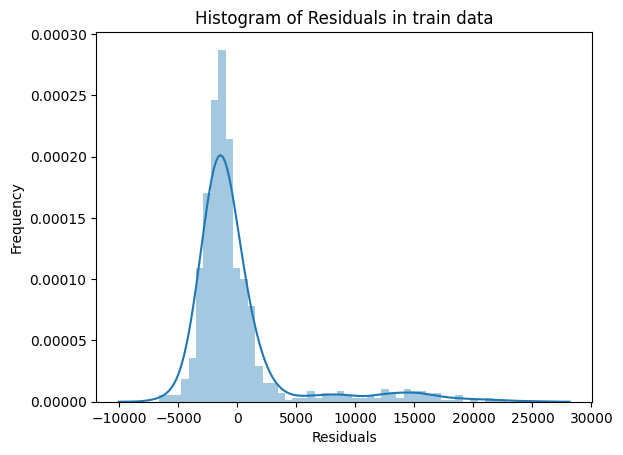

In [ ]:
sns.distplot(y_train-y_train_pred)
plt.title("Histogram of Residuals in train data")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

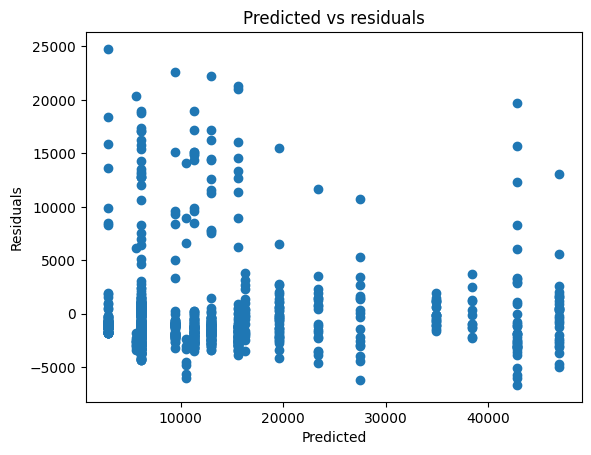

In [ ]:
# Checking residuals
plt.scatter(y_train_pred,y_train-y_train_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

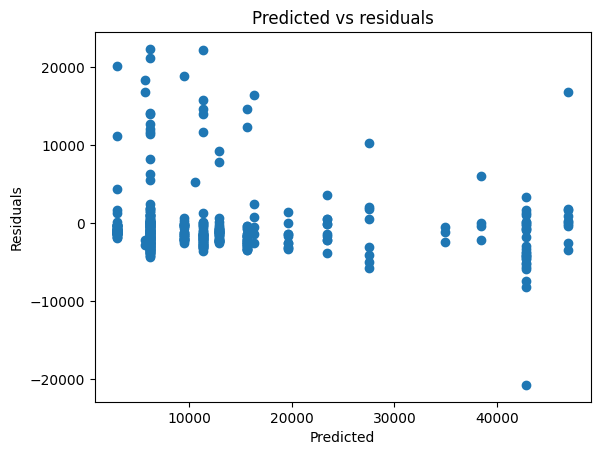

In [ ]:
plt.scatter(pred,y_test-pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Text(0, 0.5, 'Predicted values')

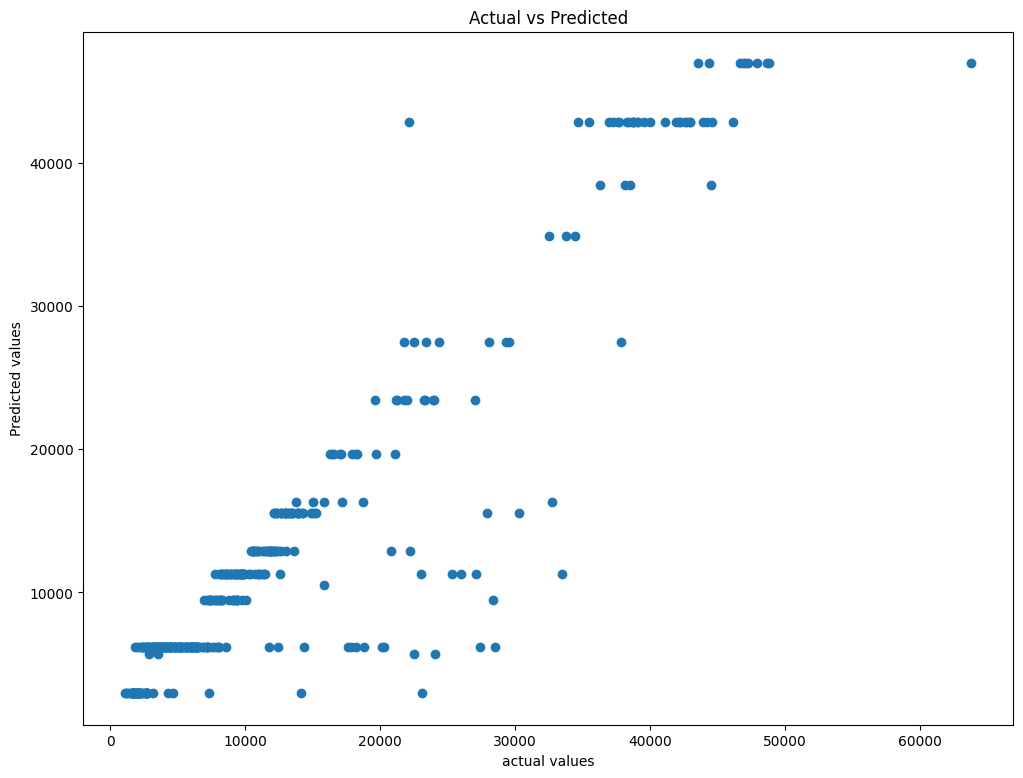

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(y_test,pred)
plt.title("Actual vs Predicted")
plt.xlabel("actual values")
plt.ylabel("Predicted values")

In [42]:
prediction = pipe4.predict(pd.DataFrame(data={'age':[19],'sex':['female'],'bmi':[27.900],'children':[0],'smoker':['yes'],'region':['southwest']}))

In [43]:
prediction

array([19641.93834605])

In [ ]:
import pickle
pickleout = open("insurance_predict.pkl",'wb')
pickle.dump(pipe4,pickleout)
pickleout.close()